In [8]:
import pandas as pd
data = pd.read_csv('data/training_data_fall2024.csv')

from sklearn.preprocessing import StandardScaler

# 选择天气相关特征
weather_features = ['temp', 'dew', 'humidity', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']

# 标准化
scaler = StandardScaler()
# weather_scaled = scaler.fit_transform(data[weather_features])
weather_scaled = data[weather_features]

In [9]:
from sklearn.cluster import KMeans

# 初始化K-Means，聚类数设为2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(weather_scaled)

# 获取聚类标签
data['weather_cluster'] = kmeans.labels_

# 查看聚类结果
print(data['weather_cluster'].value_counts())


weather_cluster
0    960
1    640
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [10]:
# 创建聚类中心 DataFrame
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=weather_features)
print(cluster_centers)


        temp       dew   humidity  snowdepth  windspeed  cloudcover  \
0  14.966875  8.708125  68.610260   0.060927  13.354687   88.784583   
1  15.575469  6.314687  56.904219   0.015391  12.674219   27.629063   

   visibility  
0   14.976979  
1   15.894844  


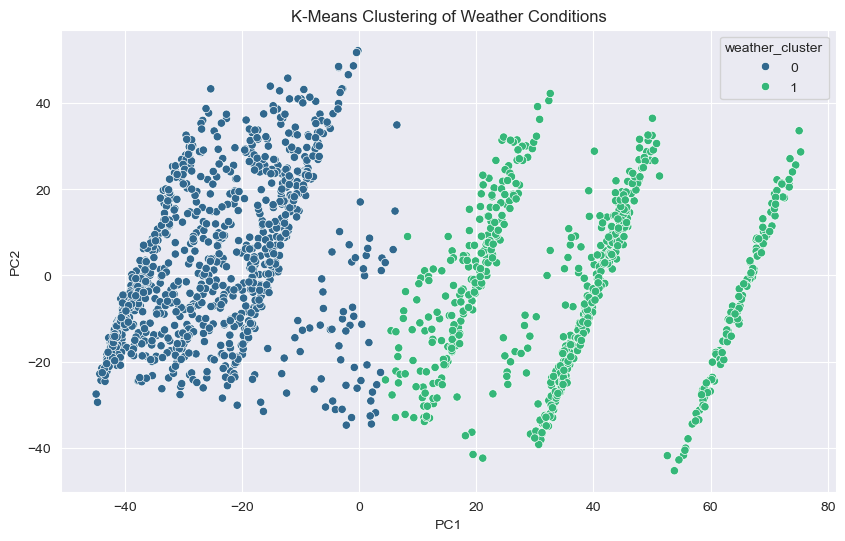

In [11]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
# 初始化 PCA
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(weather_scaled)

# 创建 DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['weather_cluster'] = data['weather_cluster']

# 绘制聚类结果
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='weather_cluster', data=pca_df, palette='viridis')
plt.title('K-Means Clustering of Weather Conditions')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

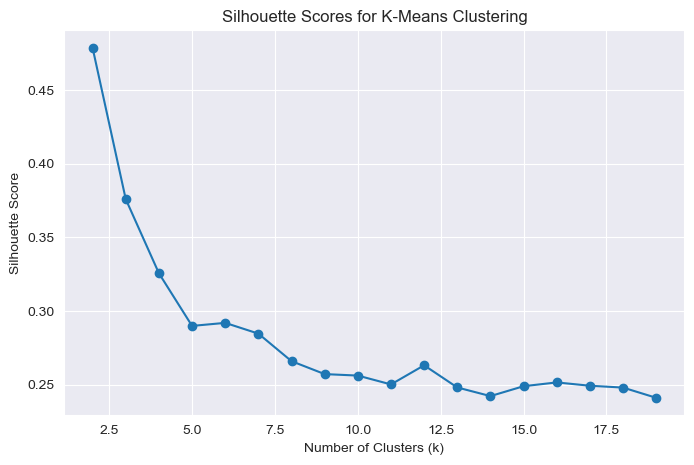

In [12]:
from sklearn.metrics import silhouette_score

# 计算不同聚类数的轮廓系数
sil_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(weather_scaled)
    labels = kmeans.labels_
    sil = silhouette_score(weather_scaled, labels)
    sil_scores.append(sil)

# 绘制轮廓系数
plt.figure(figsize=(8, 5))
plt.plot(range(2 , 20), sil_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means Clustering')
plt.show()


In [6]:
import pandas as pd

# Assuming 'weather_scaled' is the standardized weather features used for clustering
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=weather_features)
print("Cluster Centers (Standardized):")
print(cluster_centers)

# To interpret, inverse transform to original scale
cluster_centers_original = scaler.inverse_transform(cluster_centers)
cluster_centers_original_df = pd.DataFrame(cluster_centers_original, columns=weather_features)
print("\nCluster Centers (Original Scale):")
print(cluster_centers_original_df)


Cluster Centers (Standardized):
    summertime      temp       dew  humidity  snowdepth  windspeed  \
0     0.743907 -0.274712 -0.669259 -0.916143  -0.101439   2.003087   
1     0.743907 -0.303110 -0.713118 -0.947300  -0.031588  -0.190617   
2     0.743907 -0.248916 -0.054217  0.275294  -0.101439  -0.896545   
3    -1.234350 -1.478967 -1.816802 -1.157866   0.398962   1.397308   
4     0.692348  0.932621  0.369126 -0.874750  -0.101439   1.096363   
5     0.688956  0.090945  0.670204  1.397012  -0.101439   0.148866   
6    -1.344254 -1.048495 -1.000535 -0.230547  -0.077690  -0.607752   
7    -1.344254 -1.541026 -1.062596  0.655802  13.147674   1.407942   
8     0.743907 -0.214569  0.190580  0.814459  -0.101439  -0.218784   
9    -1.344254 -1.093403 -0.408883  1.393323   0.132095  -0.344098   
10    0.727594  0.926242  1.099236  0.538500  -0.101439  -0.497672   
11   -1.344254 -1.177547 -0.825051  0.400450  -0.076502  -0.490120   
12    0.743907  0.875199  1.100939  0.643880  -0.101439   

# 时间划分测试块

<Figure size 1200x600 with 0 Axes>

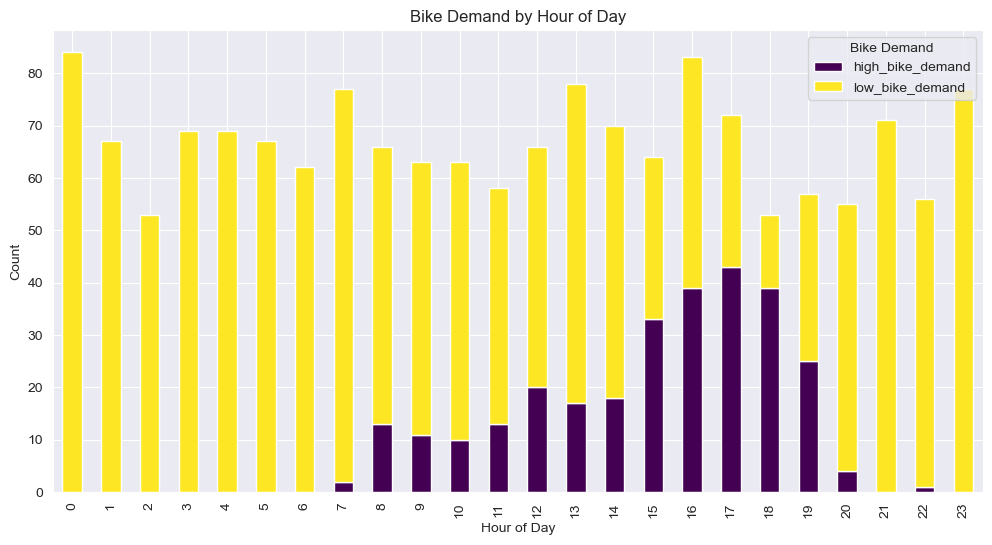

In [93]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('data/training_data_fall2024.csv')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设您的数据中有 'hour_of_day' 和 'increase_stock' 列

# 创建一个包含小时和需求计数的数据框
hourly_demand = data.groupby('hour_of_day')['increase_stock'].value_counts().unstack().fillna(0)

# 绘制堆叠柱状图
plt.figure(figsize=(12, 6))
hourly_demand.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Bike Demand by Hour of Day')
plt.legend(title='Bike Demand')
plt.show()


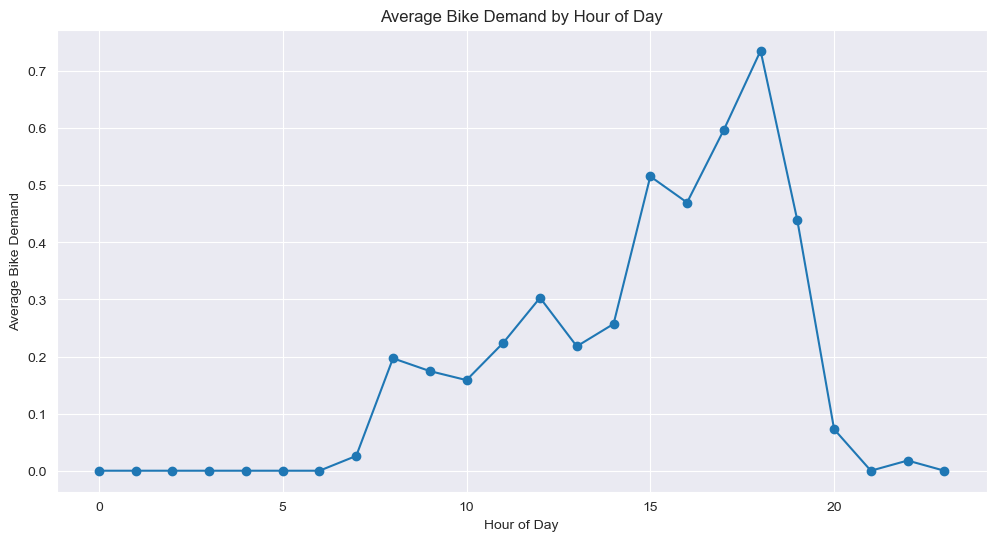

In [94]:
# 将 'increase_stock' 映射为数值
data['increase_stock_numeric'] = data['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1})

# 计算每小时的平均需求
hourly_average_demand = data.groupby('hour_of_day')['increase_stock_numeric'].mean()

# 绘制折线图
plt.figure(figsize=(12, 6))
hourly_average_demand.plot(kind='line', marker='o', figsize=(12, 6))
plt.xlabel('Hour of Day')
plt.ylabel('Average Bike Demand')
plt.title('Average Bike Demand by Hour of Day')
plt.grid(True)
plt.show()

   holiday  weekday  time_period_peak  summertime      temp       dew  \
0        0        0             False   -1.344254 -2.419627 -2.269781   
1        0        1              True   -1.344254 -1.782607 -2.050293   
2        0        1              True    0.743907  1.262128  1.401656   
3        0        0             False   -1.344254 -1.307542 -1.172340   
4        0        1              True   -1.344254 -0.379006 -1.910618   

   humidity    precip  snowdepth  windspeed  cloudcover  visibility  \
0 -0.537283 -0.209118  -0.124683   0.414935   -0.999503    0.242212   
1 -1.203654 -0.209118  -0.124683   1.395045    0.652979    0.242212   
2  0.496090 -0.209118  -0.124683  -1.687144    0.512472    0.242212   
3 -0.219564 -0.209118  -0.124683   0.788924   -1.964724    0.242212   
4 -2.370721 -0.209118  -0.124683  -0.333044   -0.602419    0.242212   

   month_sin  month_cos  day_of_week_sin  day_of_week_cos  hour_of_day_sin  \
0   0.678434   1.227255        -1.356549        -0.31097

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


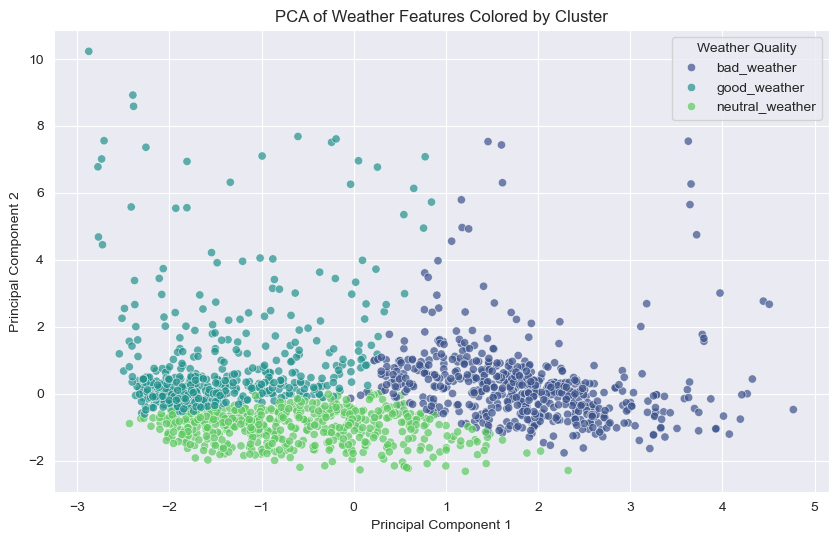

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('data/training_data_fall2024.csv')
def process_time_data_scale(data):
    # Transform cyclical time features
    data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
    data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

    data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
    data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

    data['hour_of_day_sin'] = np.sin(2 * np.pi * data['hour_of_day'] / 24)
    data['hour_of_day_cos'] = np.cos(2 * np.pi * data['hour_of_day'] / 24)

    def assign_time_period(hour):
        # if 7 <= hour <= 10:
        #     return 'morning_peak'
        # elif 11 <= hour <= 14:
        #     return 'midday'
        # elif 15 <= hour <= 20:
        #     return 'evening_peak'
        # elif 21 <= hour <= 23:
        #     return 'night'
        # else:
        #     return 'late_night'
        if 7 <= hour <= 22:
            return 'peak'
        else:
            return 'non_peak'

    data['hour_of_day'] = data['hour_of_day'].astype(int)
    data['time_period'] = data['hour_of_day'].apply(assign_time_period)
    time_period_dummies = pd.get_dummies(data['time_period'], prefix='time_period', drop_first=True)

    # 将时间段独热编码添加到数据中
    data = pd.concat([data, time_period_dummies], axis=1)

    # Drop original cyclical features
    data = data.drop(columns=['month', 'day_of_week', 'hour_of_day', 'time_period'], axis=1)

    # Select numerical features to scale (excluding 'holiday', 'weekday' 和时间段独热编码)
    numeric_features = data.drop(['holiday', 'weekday'] + list(time_period_dummies.columns), axis=1).select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Standardize numerical features
    scaler = StandardScaler()
    numeric_data = pd.DataFrame(scaler.fit_transform(data[numeric_features]),
                                columns=numeric_features,
                                index=data.index)

    # Concatenate scaled numerical features with categorical features 和时间段独热编码
    processed_data = pd.concat([data[['holiday', 'weekday']], time_period_dummies, numeric_data], axis=1)

    return processed_data, scaler



# 对数变换，减少影响
data = data.drop(columns=['snow',], axis=1)
data['visibility'] = np.log1p(data['visibility'])
data['snowdepth'] = np.log1p(data['snowdepth'])
data['precip'] = np.log1p(data['precip'])
# Apply the processing function
processed_data, scaler = process_time_data_scale(data)

print(processed_data.head())
from sklearn.cluster import KMeans

# Select features for clustering
clustering_features = ['summertime', 'temp', 'dew', 'humidity', 'snowdepth', 'windspeed', 'cloudcover', 'visibility', 'precip']

# Initialize K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit K-Means on the selected features
kmeans.fit(processed_data[clustering_features])

# Assign cluster labels to the data
processed_data['weather_cluster'] = kmeans.labels_

# Display cluster assignments
print("-----------------------------------")
print(processed_data[['weather_cluster']].head())
print("-----------------------------------\n\n\n")
# Cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=clustering_features)
print("Cluster Centers (Original Scale):")
print(cluster_centers)
print("-----------------------------------\n\n\n")
def label_weather_cluster(cluster_label):
    if cluster_label == 1:
        return 'bad_weather'
    elif cluster_label == 0:
        return 'good_weather'
    elif cluster_label == 2:
        return 'neutral_weather'

# Apply labeling
processed_data['weather_quality'] = processed_data['weather_cluster'].apply(label_weather_cluster)

# Display labeled clusters
print(processed_data[['weather_cluster', 'weather_quality']].head())
print("-----------------------------------\n\n\n")
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize PCA
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(processed_data[clustering_features])

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['weather_cluster'] = processed_data['weather_cluster']
pca_df['weather_quality'] = processed_data['weather_quality']

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='weather_quality', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA of Weather Features Colored by Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Weather Quality')
plt.show()

# One-Hot Encode 'weather_quality'
weather_dummies = pd.get_dummies(processed_data['weather_quality'], prefix='weather', drop_first=True)
# 更新时间段编码
time_period_columns = [col for col in processed_data.columns if col.startswith('time_period_')]
# Concatenate with the processed data
processed_data = pd.concat([processed_data, weather_dummies], axis=1)

# Define categorical and numerical features
"""移除原本的特征"""
weather_features = ['summertime', 'temp', 'dew', 'humidity', 'snowdepth', 'windspeed', 'cloudcover', 'visibility', 'precip']
categorical_features = ['holiday', 'weekday'] + list(weather_dummies.columns) + time_period_columns
# 更新 numeric_features，排除天气特征
numeric_features = [col for col in processed_data.columns if col not in [
    'holiday', 'weekday', 'increase_stock', 'weather_cluster', 'weather_quality'
] + list(weather_dummies.columns) + time_period_columns + weather_features]

# 将所有布尔类型列转换为整数类型
for col in processed_data.select_dtypes(include=['bool']).columns:
    processed_data[col] = processed_data[col].astype(int)

# Final feature set
#X = processed_data[categorical_features + numeric_features].to_numpy().astype(np.float64)
X = processed_data[categorical_features + numeric_features]
y = data['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1}).to_numpy().reshape(-1, 1)
# y = data['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1})

In [8]:
X

,holiday,weekday,weather_good_weather,weather_neutral_weather,time_period_peak,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_of_day_sin,hour_of_day_cos
0,0,0,0,0,0,0.678434,1.227255,-1.356549,-0.310979,1.371739,0.367380
1,0,1,0,0,1,0.678434,1.227255,-0.586476,-1.264846,-1.013450,0.996355
2,0,1,1,0,1,-1.259495,-0.699517,0.648624,-1.264846,-1.013450,0.996355
3,0,0,0,0,0,0.678434,1.227255,-1.081713,0.878475,0.363639,1.359495
4,0,1,0,0,1,1.387764,0.005730,0.031074,1.407831,-1.382440,-0.358899
...,...,...,...,...,...,...,...,...,...,...,...
1595,0,0,1,0,0,-0.030897,-1.404765,-1.356549,-0.310979,1.002749,0.996355
1596,0,1,1,0,1,-0.030897,-1.404765,0.031074,1.407831,-0.718185,-1.210848
1597,0,1,0,0,1,1.387764,0.005730,0.031074,1.407831,-0.374341,-1.351014
1598,0,0,0,1,1,1.387764,0.005730,-1.356549,-0.310979,-0.718185,-1.210848


In [126]:
from scripts.evaluation import evaluate_model
from scripts.hyperparameter_tuning import tune_random_forest_rs
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    )

"""Choose whether we need to balance the dataset"""
# X_train_bal, y_train_bal = balance_classes(X_train, y_train)

X_train_bal, y_train_bal = X_train, y_train

# """试图使用LDA正则化，甚至降低了精度的作用"""
# lda = LinearDiscriminantAnalysis()
# X_train_bal_lda = lda.fit_transform(X_train_bal, y_train_bal.ravel())
# X_test_lda = lda.transform(X_test)


# Hyperparameter tuning for Random Forest
print("Tuning Random Forest...")
best_rf = tune_random_forest_rs(X_train_bal, y_train_bal)
# Evaluate the tuned Random Forest model
accuracy, f1, report = evaluate_model(best_rf, X_test, y_test)
print(f"Tuned Random Forest Accuracy: {accuracy:.2f}")
print(f"Tuned Random Forest F1 Score: {f1:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_matrix(y_test, best_rf.predict(X_test)))
print(f"\n\n\n\n")

Tuning Random Forest...
Tuned Random Forest Accuracy: 0.85
Tuned Random Forest F1 Score: 0.62
Classification Report:
                   precision    recall  f1-score   support

 low_bike_demand       0.95      0.87      0.91       270
high_bike_demand       0.52      0.76      0.62        50

        accuracy                           0.85       320
       macro avg       0.74      0.82      0.76       320
    weighted avg       0.88      0.85      0.86       320

Confusion Matrix:
 [[235  35]
 [ 12  38]]







C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-package

# 天气聚类分析

   holiday  weekday  summertime      temp       dew  humidity    precip  \
0        0        0   -1.344254 -2.419627 -2.269781 -0.537283 -0.209118   
1        0        1   -1.344254 -1.782607 -2.050293 -1.203654 -0.209118   
2        0        1    0.743907  1.262128  1.401656  0.496090 -0.209118   
3        0        0   -1.344254 -1.307542 -1.172340 -0.219564 -0.209118   
4        0        1   -1.344254 -0.379006 -1.910618 -2.370721 -0.209118   

   snowdepth  windspeed  cloudcover  visibility  month_sin  month_cos  \
0  -0.124683   0.414935   -0.999503    0.242212   0.678434   1.227255   
1  -0.124683   1.395045    0.652979    0.242212   0.678434   1.227255   
2  -0.124683  -1.687144    0.512472    0.242212  -1.259495  -0.699517   
3  -0.124683   0.788924   -1.964724    0.242212   0.678434   1.227255   
4  -0.124683  -0.333044   -0.602419    0.242212   1.387764   0.005730   

   day_of_week_sin  day_of_week_cos  hour_of_day_sin  hour_of_day_cos  
0        -1.356549        -0.310979   

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


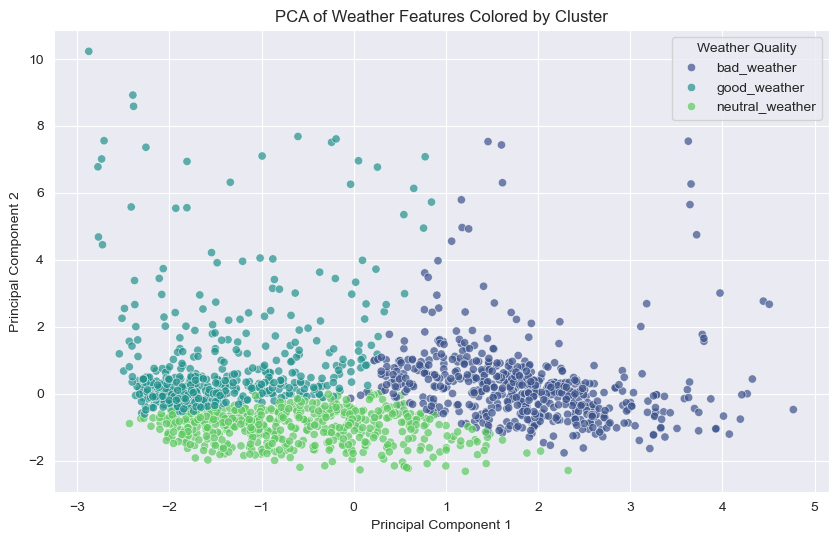

In [110]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('data/training_data_fall2024.csv')
def process_time_data_scale(data):
    # Transform cyclical time features
    data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
    data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

    data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
    data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

    data['hour_of_day_sin'] = np.sin(2 * np.pi * data['hour_of_day'] / 24)
    data['hour_of_day_cos'] = np.cos(2 * np.pi * data['hour_of_day'] / 24)

    
    # Drop original cyclical features
    data = data.drop(columns=['month', 'day_of_week', 'hour_of_day'], axis=1)

    # Select numerical features to scale (excluding 'holiday' and 'weekday')
    numeric_features = data.drop(['holiday', 'weekday'], axis=1).select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Standardize numerical features
    scaler = StandardScaler()
    numeric_data = pd.DataFrame(scaler.fit_transform(data[numeric_features]),
                                columns=numeric_features,
                                index=data.index)

    # Concatenate scaled numerical features with categorical features
    processed_data = pd.concat([data[['holiday', 'weekday']], numeric_data], axis=1)

    return processed_data, scaler


# 对数变换，减少影响
data = data.drop(columns=['snow',], axis=1)
data['visibility'] = np.log1p(data['visibility'])
data['snowdepth'] = np.log1p(data['snowdepth'])
data['precip'] = np.log1p(data['precip'])
# Apply the processing function
processed_data, scaler = process_time_data_scale(data)

print(processed_data.head())
from sklearn.cluster import KMeans

# Select features for clustering
clustering_features = ['summertime', 'temp', 'dew', 'humidity', 'snowdepth', 'windspeed', 'cloudcover', 'visibility', 'precip']

# Initialize K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit K-Means on the selected features
kmeans.fit(processed_data[clustering_features])

# Assign cluster labels to the data
processed_data['weather_cluster'] = kmeans.labels_

# Display cluster assignments
print("-----------------------------------")
print(processed_data[['weather_cluster']].head())
print("-----------------------------------\n\n\n")
# Cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=clustering_features)
print("Cluster Centers (Original Scale):")
print(cluster_centers)
print("-----------------------------------\n\n\n")
def label_weather_cluster(cluster_label):
    if cluster_label == 1:
        return 'bad_weather'
    elif cluster_label == 0:
        return 'good_weather'
    elif cluster_label == 2:
        return 'neutral_weather'

# Apply labeling
processed_data['weather_quality'] = processed_data['weather_cluster'].apply(label_weather_cluster)

# Display labeled clusters
print(processed_data[['weather_cluster', 'weather_quality']].head())
print("-----------------------------------\n\n\n")
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize PCA
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(processed_data[clustering_features])

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['weather_cluster'] = processed_data['weather_cluster']
pca_df['weather_quality'] = processed_data['weather_quality']

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='weather_quality', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA of Weather Features Colored by Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Weather Quality')
plt.show()

# One-Hot Encode 'weather_quality'
weather_dummies = pd.get_dummies(processed_data['weather_quality'], prefix='weather', drop_first=True)

# Concatenate with the processed data
processed_data = pd.concat([processed_data, weather_dummies], axis=1)

# Define categorical and numerical features
"""移除原本的特征"""
weather_features = ['summertime', 'temp', 'dew', 'humidity', 'snowdepth', 'windspeed', 'cloudcover', 'visibility', 'precip']
categorical_features = ['holiday', 'weekday'] + list(weather_dummies.columns)
# 更新 numeric_features，排除天气特征
numeric_features = [col for col in processed_data.columns if col not in [
    'holiday', 'weekday', 'increase_stock', 'weather_cluster', 'weather_quality'
] + list(weather_dummies.columns) + weather_features]

# 将所有布尔类型列转换为整数类型
for col in processed_data.select_dtypes(include=['bool']).columns:
    processed_data[col] = processed_data[col].astype(int)

# Final feature set
X = processed_data[categorical_features + numeric_features].to_numpy().astype(np.float64)
# X = processed_data[categorical_features + numeric_features]
y = data['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1}).to_numpy().reshape(-1, 1)
# y = data['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1})

In [111]:
X

array([[ 0.        ,  0.        ,  0.        , ..., -0.31097878,
         1.37173905,  0.3673795 ],
       [ 0.        ,  1.        ,  0.        , ..., -1.26484646,
        -1.01345026,  0.99635533],
       [ 0.        ,  1.        ,  1.        , ..., -1.26484646,
        -1.01345026,  0.99635533],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.4078314 ,
        -0.37434071, -1.35101443],
       [ 0.        ,  0.        ,  0.        , ..., -0.31097878,
        -0.71818472, -1.21084786],
       [ 0.        ,  0.        ,  0.        , ...,  0.87847477,
        -0.71818472,  1.21932814]])

In [112]:
from scripts.evaluation import evaluate_model
from scripts.hyperparameter_tuning import tune_random_forest_rs
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    )

In [113]:

"""Choose whether we need to balance the dataset"""
# X_train_bal, y_train_bal = balance_classes(X_train, y_train)

X_train_bal, y_train_bal = X_train, y_train

# """试图使用LDA正则化，甚至降低了精度的作用"""
# lda = LinearDiscriminantAnalysis()
# X_train_bal_lda = lda.fit_transform(X_train_bal, y_train_bal.ravel())
# X_test_lda = lda.transform(X_test)


# Hyperparameter tuning for Random Forest
print("Tuning Random Forest...")
best_rf = tune_random_forest_rs(X_train_bal, y_train_bal)
# Evaluate the tuned Random Forest model
accuracy, f1, report = evaluate_model(best_rf, X_test, y_test)
print(f"Tuned Random Forest Accuracy: {accuracy:.2f}")
print(f"Tuned Random Forest F1 Score: {f1:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_matrix(y_test, best_rf.predict(X_test)))
print(f"\n\n\n\n")

Tuning Random Forest...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-package

Tuned Random Forest Accuracy: 0.86
Tuned Random Forest F1 Score: 0.62
Classification Report:
                   precision    recall  f1-score   support

 low_bike_demand       0.94      0.89      0.92       270
high_bike_demand       0.55      0.72      0.62        50

        accuracy                           0.86       320
       macro avg       0.75      0.80      0.77       320
    weighted avg       0.88      0.86      0.87       320

Confusion Matrix:
 [[240  30]
 [ 14  36]]







In [ ]:
from scripts.hyperparameter_tuning import tune_adaboost_rs

print("Tuning Adaboost...")
best_boot = tune_adaboost_rs(X_train_bal, y_train_bal)
accuracy, f1, report = evaluate_model(best_boot, X_test, y_test)
print(f"Tuned Adaboost Accuracy: {accuracy:.2f}")
print(f"Tuned Adaboost F1 Score: {f1:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_matrix(y_test, best_boot.predict(X_test)))
print(f"\n\n\n\n")

In [108]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import make_scorer, f1_score, accuracy_score
import numpy as np


def train_and_evaluate_lda_qda(x, y, k=10):
    # 创建K折交叉验证对象
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # 初步训练 LDA 模型
    lda = LinearDiscriminantAnalysis()
    f1_lda_scores = cross_val_score(lda, x, y, cv=kf, scoring=make_scorer(f1_score, average='weighted'))
    # f1_lda_scores = cross_val_score(lda, x, y, cv=kf, scoring=make_scorer(accuracy_score, average='weighted'))
    print("===== Initial LDA Cross-Validation Results =====")
    print(f"LDA F1 Scores for each fold: {f1_lda_scores}")
    print(f"Mean LDA F1 Score: {np.mean(f1_lda_scores):.4f}\n")

    # 对LDA模型进行超参数优化（网格搜索）
    param_grid_lda = {
        'solver': ['svd', 'lsqr', 'eigen'],  # 线性判别分析的参数
        'shrinkage': [None, 'auto'],  # 用于LSQR解算器的正则化参数
        'priors': [None, 'uniform'],  # 先验分布
    }

    grid_search_lda = GridSearchCV(lda, param_grid_lda, cv=kf, scoring='f1_weighted')
    # grid_search_lda = GridSearchCV(lda, param_grid_lda, cv=kf, scoring='accuracy_weighted')
    grid_search_lda.fit(x, y)
    accuracy, f1, report = evaluate_model(grid_search_lda, X_test, y_test)
    print("===== Optimized LDA Results =====")
    print(report)
    print(f"Best Parameters: {grid_search_lda.best_params_}")
    print(f"Best Cross-Validation F1 Score: {grid_search_lda.best_score_:.4f}\n")

    # 初步训练 QDA 模型
    qda = QuadraticDiscriminantAnalysis()
    f1_qda_scores = cross_val_score(qda, x, y, cv=kf, scoring=make_scorer(f1_score, average='weighted'))
    # f1_qda_scores = cross_val_score(qda, x, y, cv=kf, scoring=make_scorer(accuracy_score, average='weighted'))
    print("===== Initial QDA Cross-Validation Results =====")
    print(f"QDA F1 Scores for each fold: {f1_qda_scores}")
    print(f"Mean QDA F1 Score: {np.mean(f1_qda_scores):.4f}\n")

    # 对QDA模型进行超参数优化（网格搜索）
    param_grid_qda = {
        'reg_param': [0.0, 0.1, 0.5, 1.0],  # QDA的正则化参数
    }

    grid_search_qda = GridSearchCV(qda, param_grid_qda, cv=kf, scoring='f1_weighted')
    # grid_search_qda = GridSearchCV(qda, param_grid_qda, cv=kf, scoring='accuracy_weighted')
    grid_search_qda.fit(x, y)
    accuracy, f1, report = evaluate_model(grid_search_qda, X_test, y_test)
    print("===== Optimized QDA Results =====")
    print(report)
    print(f"Best Parameters: {grid_search_qda.best_params_}")
    print(f"Best Cross-Validation F1 Score: {grid_search_qda.best_score_:.4f}\n")
y = y.ravel()
train_and_evaluate_lda_qda(x=X, y=y, k=10)

C:\Users\BoyNextDoor\AppData\Local\Temp\ipykernel_34784\2453401579.py:56: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = y.ravel()


===== Initial LDA Cross-Validation Results =====
LDA F1 Scores for each fold: [0.86990589 0.83498134 0.825      0.87275858 0.85298919 0.89145369
 0.85610649 0.86577274 0.88853161 0.80688812]
Mean LDA F1 Score: 0.8564

===== Optimized LDA Results =====
                  precision    recall  f1-score   support

 low_bike_demand       0.91      0.91      0.91       270
high_bike_demand       0.54      0.54      0.54        50

        accuracy                           0.86       320
       macro avg       0.73      0.73      0.73       320
    weighted avg       0.86      0.86      0.86       320

Best Parameters: {'priors': None, 'shrinkage': None, 'solver': 'lsqr'}
Best Cross-Validation F1 Score: 0.8572

===== Initial QDA Cross-Validation Results =====
QDA F1 Scores for each fold: [0.8619606  0.88383333 0.84778613 0.85715077 0.86965179 0.91928291
 0.87324134 0.8795949  0.89910806 0.87756266]
Mean QDA F1 Score: 0.8769

===== Optimized QDA Results =====
                  precision    rec

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
70 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py", line 621, in fit
    raise NotIm

In [109]:
from sklearn.metrics import f1_score, classification_report
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train_bal, y_train_bal = X_train, y_train

# Sigmoid 函数
def sigmoid(z):
    # 裁剪，避免溢出错误
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# 损失函数
def computeLoss(y, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10) 
    m = len(y)
    return - (1 / m) * np.sum(
        y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)
    )

# 梯度计算
def computeGradient(X, y, y_pred):
    m = len(y)
    return (1 / m) * np.dot(X.T, (y_pred - y))  

# 梯度下降算法
def gradientDescent(X, y, learning_rate=0.01, num_iterations=1000):
    # 初始化参数
    n = X.shape[1]
    theta = np.zeros((n, 1))  
    b = 0 

    for i in range(num_iterations):
        # 计算预测值
        z = np.dot(X, theta) + b
        y_pred = sigmoid(z)

        # 计算损失
        loss = computeLoss(y, y_pred)

        # 计算梯度
        gradient_theta = computeGradient(X, y, y_pred)
        gradient_b = np.mean(y_pred - y)

        # 更新参数
        theta -= learning_rate * gradient_theta
        b -= learning_rate * gradient_b
    
    return theta, b

# 预测函数
def predict(X, theta, b, threshold=0.50):
    X = X.reshape(-1, X.shape[1]) 
    z = np.dot(X, theta) + b
    y_pred = sigmoid(z)
    return (y_pred >= threshold).astype(int)

# 训练模型
theta, b = gradientDescent(X_train_bal, y_train_bal, learning_rate=0.01, num_iterations=2000)

# 测试集上进行预测和评估
y_test_pred = predict(X_test, theta, b)
f1_test = f1_score(y_test.flatten(), y_test_pred.flatten(), average='binary')
print(f"Test F1 Score: {f1_test:.2f}")

# 训练集上进行预测和评估
y_train_pred = predict(X_train_bal, theta, b)
f1_train = f1_score(y_train_bal.flatten(), y_train_pred.flatten(), average='binary')
print(f"Train F1 Score: {f1_train:.2f}")

# 比较训练集和测试集的F1分数
print(f"Train vs Test F1 Score: Train F1 = {f1_train:.2f}, Test F1 = {f1_test:.2f}")

# 其他评估（如准确率等）
accuracy_test = np.mean(y_test_pred == y_test)
print(f"Test Accuracy: {accuracy_test:.2f}")

# 打印分类报告
print("\nClassification Report (Test Set):")
print(classification_report(y_test.flatten(), y_test_pred.flatten(), target_names=['low_bike_demand', 'high_bike_demand']))

# 比较标签 0 和标签 1 的准确度
y_test_flat = y_test.flatten()
y_test_pred_flat = y_test_pred.flatten()

# 标签 0 的准确度
indices_class0 = np.where(y_test_flat == 0)[0]
accuracy_class0 = np.sum(y_test_pred_flat[indices_class0] == y_test_flat[indices_class0]) / len(indices_class0)
print(f"Accuracy for label 0 (low_bike_demand): {accuracy_class0:.2f}")

# 标签 1 的准确度
indices_class1 = np.where(y_test_flat == 1)[0]
accuracy_class1 = np.sum(y_test_pred_flat[indices_class1] == y_test_flat[indices_class1]) / len(indices_class1)
print(f"Accuracy for label 1 (high_bike_demand): {accuracy_class1:.2f}")

ValueError: non-broadcastable output operand with shape (10,1) doesn't match the broadcast shape (10,1280)